In [2]:
import json
import collections
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from collections import defaultdict as dd
from os import listdir

data = collections.defaultdict(list)
    
sns.set(style="whitegrid")

In [3]:
resultfolder= "results/"
r = listdir(resultfolder)
groups = {}
s_string = ""
linestrings = {}
end1_start2 =dd(list)



# for on-route data
ons = []
ons_msgs = []
ons_tbs =[]
ons_tbg = []


# for off-route data
ofs = []
ofs_msgs = []
ofs_tsp =[]
ofs_tpbs = []
ofs_tbs =[]
ofs_tbg = []


for x in r[:]:     
    with open(resultfolder + x, 'r', encoding='utf-8') as json_file:
        result = json.load(json_file)
        
        #on-route results
        for d in result['ons']:
            mean = np.mean(d['delivered_latencies'])
            #print(d)
            temp = {
                     'Mean Delay (minutes)': mean /60,
                     'Mean Delay (hours)': mean /60/60,
                     'Upper Bound (minutes)': 2* d['minimum_roundtrip_time'] / 60,
                     'Time below upper bound (minutes)': ((2* d['minimum_roundtrip_time']) - mean) /60,
                     'delivery_rate': d['delivery_rate']
                    }
            ons.append(temp)
            ons_msgs.extend([x /60 for x in d['delivered_latencies']])

            for i in range(len(d['delivered_tbs_latencies'])):
                ons_tbs.append(d['delivered_tbs_latencies'][i])
                ons_tbg.append(d['delivered_tbg_latencies'][i])
        
        
        #off-route results
        for d in result['ofs']:
            mean = np.mean(d['delivered_latencies'])
            temp = {
                    'Mean Delay (minutes)': mean /60,
                    'Mean Delay (hours)': mean / 60 /60,
                    'delivery_rate': d['delivery_rate']
                    #'deviation': d['minimum_roundtrip_time'] - mean
                    }

            ofs.append(temp)
            ofs_msgs.extend([x /60 for x in d['delivered_latencies']])

            for i in range(len(d['delivered_tbs_latencies'])):
                ofs_tsp.append(d['delivered_tsp_latencies'][i])
                ofs_tpbs.append(d['delivered_tpbs_latencies'][i])
                ofs_tbs.append(d['delivered_tbs_latencies'][i])
                ofs_tbg.append(d['delivered_tbg_latencies'][i])

                
ofs_tsp =np.array(ofs_tsp, dtype=float)
ofs_tpbs = np.array(ofs_tpbs, dtype=float)
ofs_tbs =np.array(ofs_tbs, dtype=float)
ofs_tbg = np.array(ofs_tbg, dtype=float)

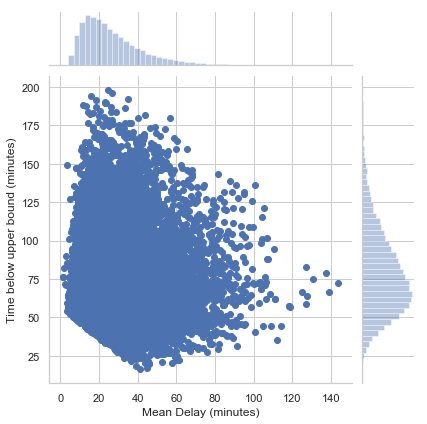

In [4]:
df = pd.DataFrame(ons)
ymax = df['Mean Delay (minutes)'].max()
ymin = df['Time below upper bound (minutes)'].min()

ax = sns.jointplot(x="Mean Delay (minutes)", y="Time below upper bound (minutes)", data=df)

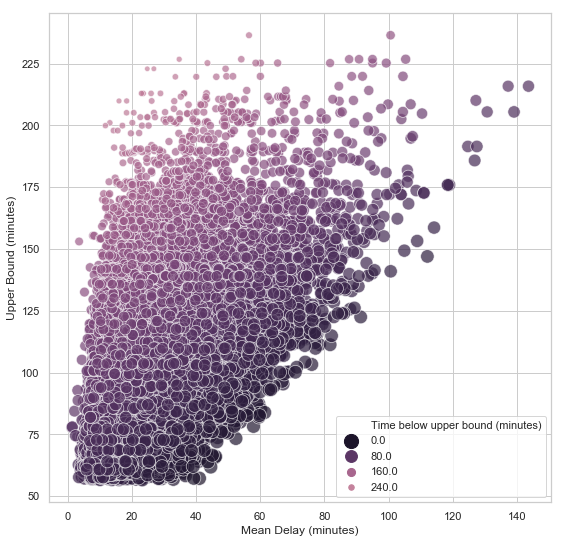

In [5]:
cmap = sns.cubehelix_palette(dark=0.6, light=.1, as_cmap=True)
fig, ax = plt.subplots(figsize=(9,9))
ax = sns.scatterplot(ax=ax,
                     x="Mean Delay (minutes)", 
                     y="Upper Bound (minutes)",
                     hue="Time below upper bound (minutes)",
                     size='Time below upper bound (minutes)',
                     sizes=(200, 30),
                     alpha=0.7,
                     palette=cmap,
                     data=df)

ax.figure.savefig('ons_delay', dpi=300)

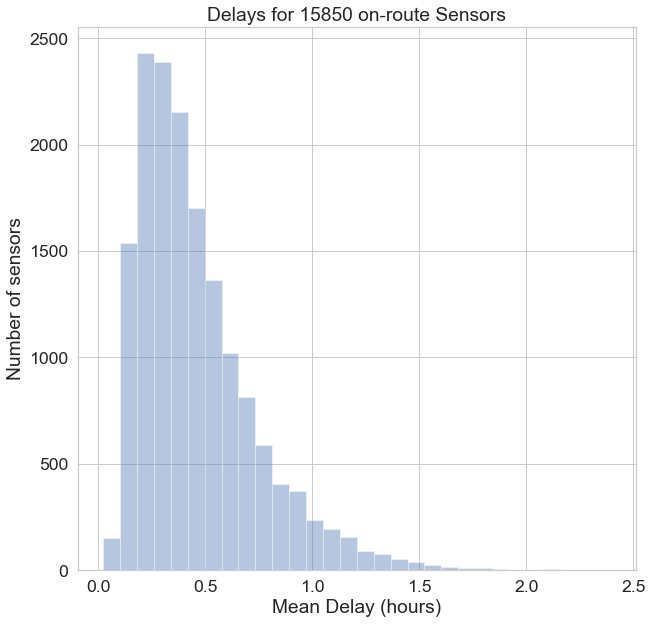

In [6]:
sns.set(font_scale=1.6, style="whitegrid") 
plt.subplots_adjust(hspace=0.35, wspace=0.2)

df2 = pd.DataFrame(ofs)

ax = sns.distplot(df['Mean Delay (hours)'], bins= 30, kde=False, norm_hist= False)
ax.set_title("Delays for {0} on-route Sensors".format(len(df)))
ax.figure.set_size_inches((10,10))
ax.set_ylabel('Number of sensors')

ax.figure.savefig('a.png', dpi=300)

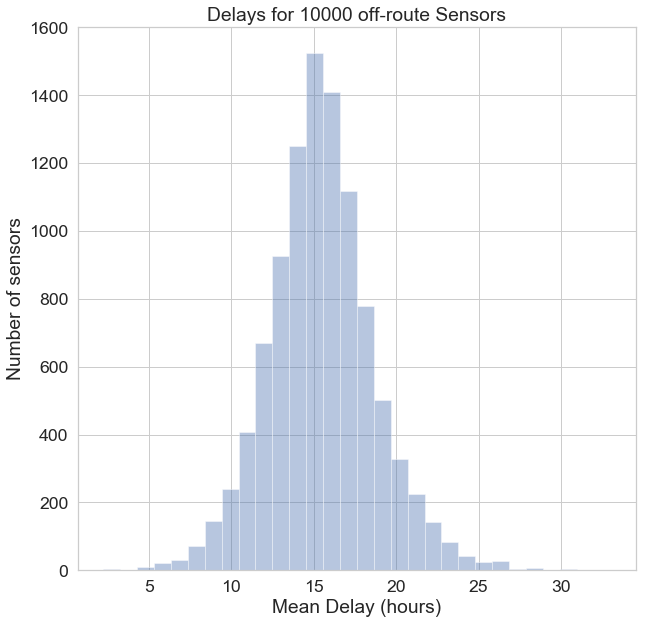

In [7]:
ax = sns.distplot(df2['Mean Delay (hours)'].dropna(), bins= 30, kde=False, norm_hist= False)
ax.set_title("Delays for {0} off-route Sensors".format(len(df2)))
#ax1.figure.set_size_inches((10,10))

#ax1.set_title('(b)');
ax.set_ylabel('Number of sensors')
ax.figure.set_size_inches((10,10))

ax.figure.savefig('b.png', dpi=300)

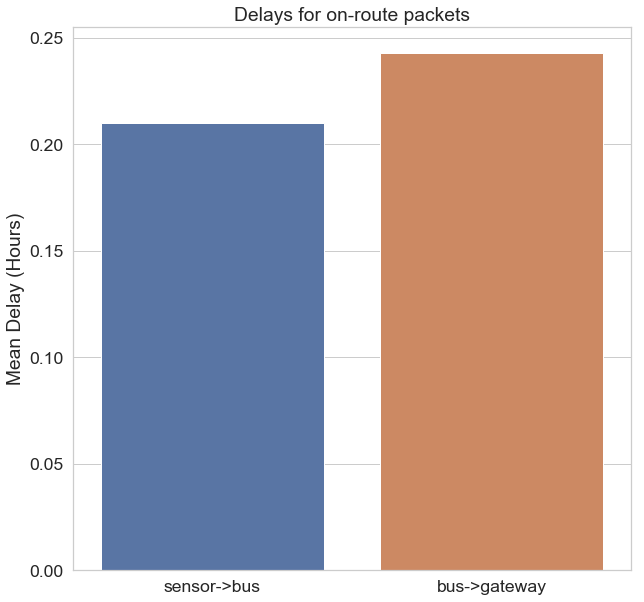

In [8]:
import scipy.stats.stats as st
ax = sns.barplot(x=['sensor \u2192 bus','bus \u2192 gateway'], y=[np.mean(ons_tbs)/60/60, np.mean(ons_tbg)/60/60])
#ax.set_title('(c)');
ax.set_ylabel('Mean Delay (Hours)')
ax.figure.set_size_inches((10,10))
ax.set_title("Delays for on-route packets")

ax.figure.savefig('c.png', dpi=300)

Text(0.5, 1.0, 'Delays for off-route packets')

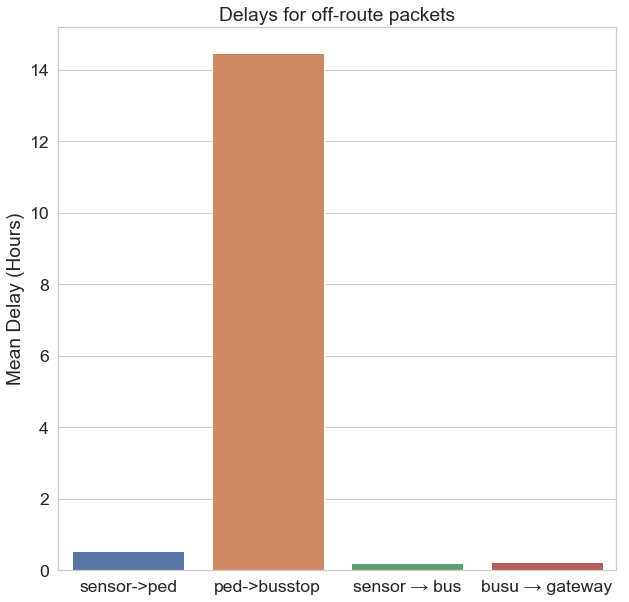

In [10]:
ax = sns.barplot(x=['sensor \u2192 ped','ped \u2192 busstop','sensor \u2192 bus','busu \u2192 gateway'], \
                y=[np.nanmean(ofs_tsp)/60/60, np.nanmean(ofs_tpbs)/60/60,np.nanmean(ofs_tbs)/60/60, np.nanmean(ofs_tbg)/60/60])

#ax4.set_title('(d)');
ax.set_ylabel('Mean Delay (Hours)')
#fig.savefig('results.png', dpi=300)
ax.figure.set_size_inches((10,10))
ax.figure.savefig('d.png', dpi=300)
ax.set_title("Delays for off-route packets")

Sensor->Bus 
Mean: 12.601684256213572, Median: 8.749159347851954
Bus->Gateway 
Mean: 14.588242395082004, Median: 10.802881418395113


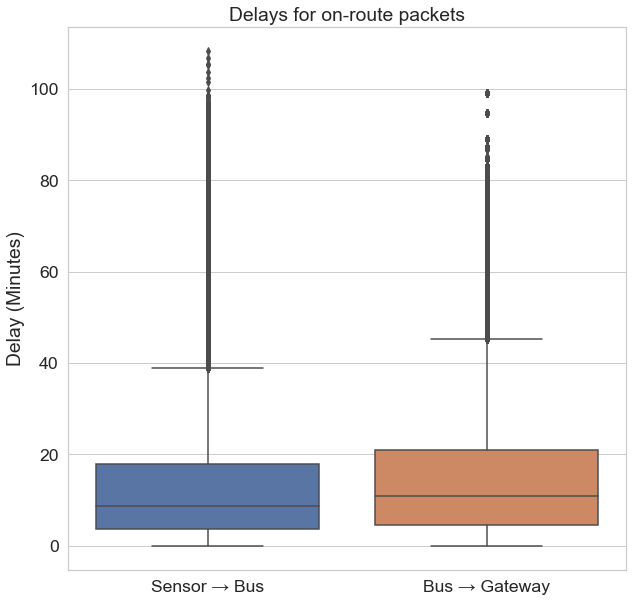

In [15]:
ax = sns.boxplot(x=['Sensor \u2192 Bus','Bus \u2192 Gateway'], y=[np.array(ons_tbs)/60, np.array(ons_tbg)/60])
#ax.set_title('(e)');
ax.set_ylabel('Delay (Minutes)')
ax.figure.set_size_inches((10,10))
ax.set_title("Delays for on-route packets")
ax.figure.savefig('e.png', dpi=300)

print("Sensor->Bus \nMean: {0}, Median: {1}".format(np.mean(ons_tbs)/60, np.median(ons_tbs)/60))
print("Bus->Gateway \nMean: {0}, Median: {1}".format(np.mean(ons_tbg)/60, np.median(ons_tbg)/60))

Sensor->Ped 
Mean: 0.5388819962667225, Median: 0.49955243331112725
Ped->Busstop 
Mean: 14.475801992678814, Median: 12.511570984043734


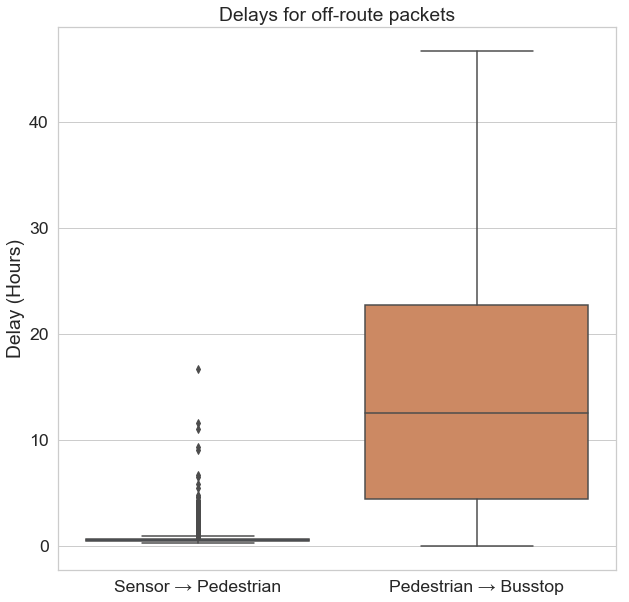

In [14]:
a, b = ofs_tsp[~np.isnan(ofs_tsp)]/60/60, ofs_tpbs[~np.isnan(ofs_tpbs)]/60/60
c,d = ofs_tbs[~np.isnan(ofs_tbs)]/60/60, ofs_tbg[~np.isnan(ofs_tbg)]/60/60

ax = sns.boxplot(x=['Sensor \u2192 Pedestrian','Pedestrian \u2192 Busstop'],\
                  y=[a, b])
#ax.set_title('(c)');
ax.set_ylabel('Delay (Hours)')
ax.figure.set_size_inches((10,10))

ax.set_title("Delays for off-route packets")
ax.figure.savefig('f.png', dpi=300)

print("Sensor->Ped \nMean: {0}, Median: {1}".format(np.mean(a), np.median(a)))
print("Ped->Busstop \nMean: {0}, Median: {1}".format(np.mean(b), np.median(b)))

busstop->bus 
Mean: 0.20697859364265242, Median: 0.14429771896959254
bus->gateway 
Mean: 0.23976444778456388, Median: 0.17910783732324245


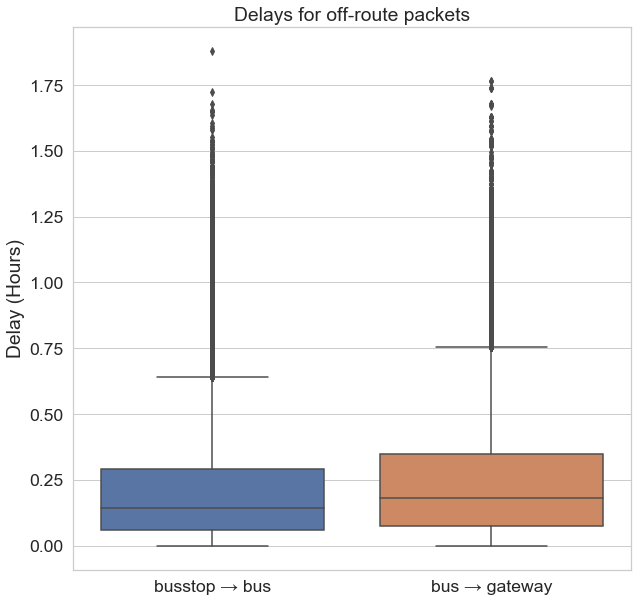

In [16]:
ax = sns.boxplot(x=['busstop \u2192 bus','bus \u2192 gateway'],\
                  y=[c, d])
ax.set_ylabel('Delay (Hours)')
ax.figure.set_size_inches((10,10))
ax.set_title("Delays for off-route packets")
ax.figure.savefig('f.png', dpi=300)
print("busstop->bus \nMean: {0}, Median: {1}".format(np.mean(c), np.median(c)))
print("bus->gateway \nMean: {0}, Median: {1}".format(np.mean(d), np.median(d)))

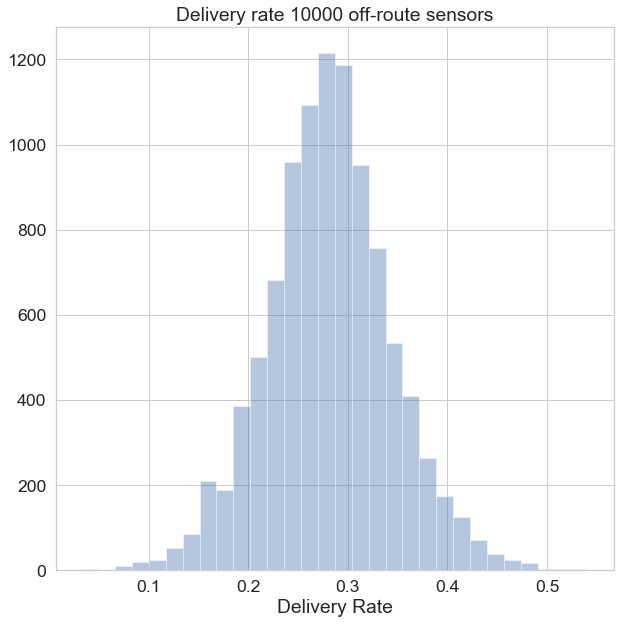

In [21]:
df2 = pd.DataFrame(ofs)
ax = sns.distplot(df2['delivery_rate'].dropna(), bins= 30, kde=False, rug=False)
ax.set_title("Delivery rate {0} off-route sensors".format(len(df2)))
ax.figure.set_size_inches((10,10))
ax.set_xlabel('Delivery Rate')
ax.figure.savefig('g.png', dpi=300)

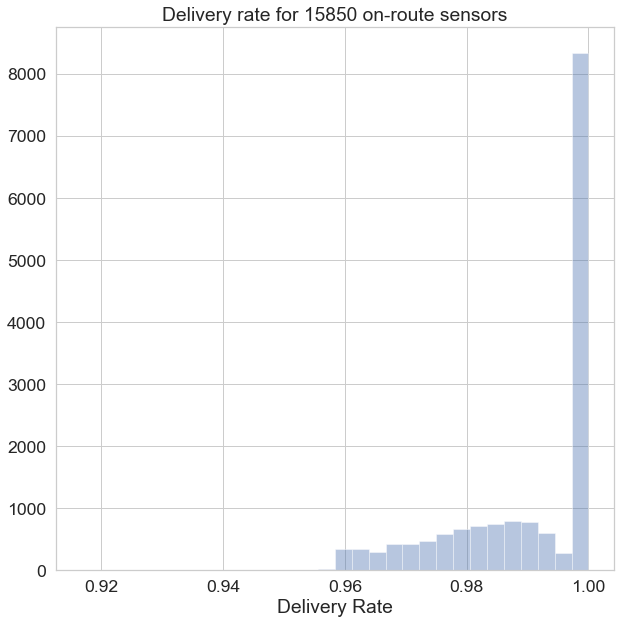

In [23]:
df['Mean Delay (hours)'] = df['Mean Delay (minutes)']/60
ax = sns.distplot(df['delivery_rate'].dropna(), bins= 30, kde=False, rug=False)
ax.set_title("Delivery rate for {0} on-route sensors".format(len(df)))
ax.figure.set_size_inches((10,10))
ax.set_xlabel('Delivery Rate')
ax.figure.savefig('h.png', dpi=300)

(Text(0.5, 0, 'Delay (minutes)'), Text(0, 0.5, 'Frequency'))

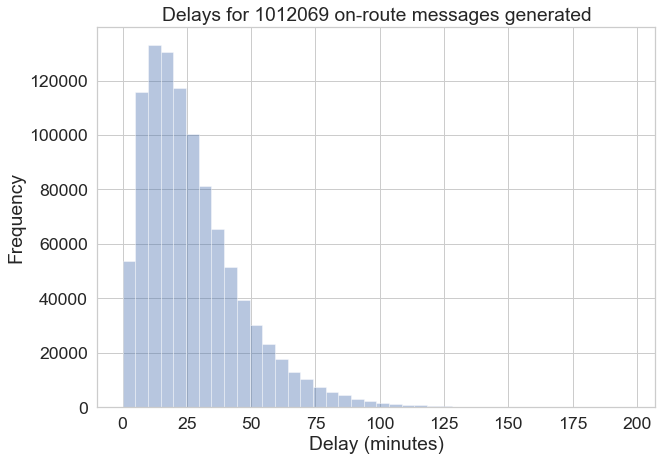

In [17]:
df['Mean Delay (hours)'] = df['Mean Delay (minutes)']/60
ax = sns.distplot(ons_msgs, kde=False, bins= 40)
ax.set_title("Delays for {0} on-route messages generated".format(len(ons_msgs)))
ax.figure.set_size_inches((10,7))
ax.set_xlabel('Delay (minutes)'), ax.set_ylabel('Frequency')

(Text(0.5, 0, 'Delay (minutes)'), Text(0, 0.5, 'Frequency'))

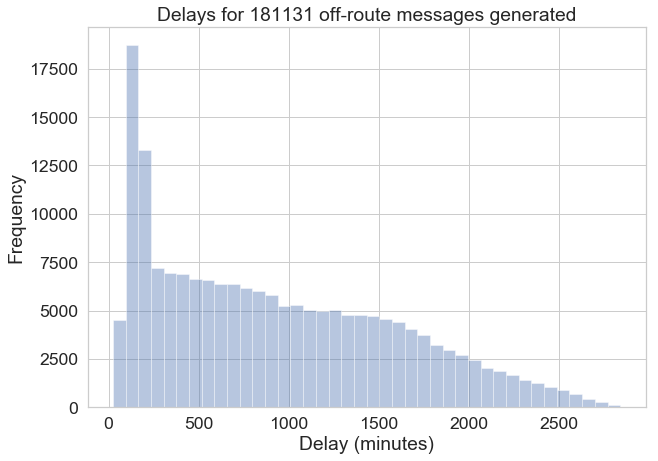

In [18]:
df['Mean Delay (hours)'] = df['Mean Delay (minutes)']/60
ax = sns.distplot(ofs_msgs, kde=False, bins= 40)
ax.set_title("Delays for {0} off-route messages generated".format(len(ofs_msgs)))
ax.figure.set_size_inches((10,7))
ax.set_xlabel('Delay (minutes)'), ax.set_ylabel('Frequency')